In [1]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

In [2]:

#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/02/20/1487608922.h5'

filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/02/16/1487268905.h5'

In [3]:
h = katdal.open(filename)

In [4]:
print h

Name: /var/kat/archive2/data/MeerKATAR1/telescope_products/2017/02/16/1487268905.h5 (version 3.0)
Observer: Fannie  Experiment ID: 20170216-0037
Description: 'Generic AR1 phaseup'
Observed from 2017-02-16 20:15:10.235 SAST to 2017-02-16 20:21:09.976 SAST
Dump rate / period: 0.25011 Hz / 3.998 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m001,m003,m006,m010,m014,m021,m025,m031,m034,m062,m063  22      264
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M32k  1284.000         856.000          32768        26.123
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m003', 'm001', 'm014', 'm006', 'm063', 'm062', 'm021', 'm010', 'm034', 'm025', 'm031']
  spw=0
-------------------------------------------------------------------------------
Shape: (90 dumps, 32768 channels, 264 correlation prod

In [5]:
# check what dynamic Telescope state keys we have
#print h.file['TelescopeState'].keys()

In [6]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_B  ---  5
    cal_product_K  ---  10
    cal_product_G  ---  22


In [7]:
np.set_printoptions(precision=4,suppress=True)

In [8]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V149">
[['m001', 'm003', 'm006', 'm010', 'm014', 'm021', 'm025', 'm031', 'm034', 'm062', 'm063']]
['m001' 'm003' 'm006' 'm010' 'm014' 'm021' 'm025' 'm031' 'm034' 'm062'
 'm063']


# Delays

In [9]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [10]:
k_array.shape #Times,Pols,Antennas

(10, 2, 11)

In [36]:
k_array.shape[0]

10

In [11]:
# print delays (if there are few delays)
print 'POL 0: ', k_0
print 'POL 1: ', k_1

POL 0:  [[  41.9994  -18.7992  -23.2862    0.      -14.0368   92.2382   18.6502
   -60.8115    4.5557   -9.431     4.6726]
 [  45.6685  -18.7407  -23.2948   -0.      -13.9995   92.3204   18.6612
   -60.7753    4.6546   -9.4397    4.7024]
 [  -3.672    -0.0502    0.026     0.       -0.0179   -0.073     0.0065
     0.0018   -0.044     0.0295   -0.0251]
 [ -83.6577   -6.4371  -23.5312   -0.        8.5273   79.4305 -252.131
   -40.0165    4.4213    3.1015    4.4982]
 [ 125.6516  -12.3331    0.2871   -0.      -22.5457   12.8143  270.84
   -20.7698    0.1731  -12.5405    0.1624]
 [  42.0065  -18.7873  -23.2762    0.      -14.0508   92.2133   18.659
   -60.801     4.5497   -9.4654    4.63  ]
 [  -0.0028   -0.0069   -0.027     0.       -0.0031    0.0097   -0.0024
     0.0103    0.0179    0.0075    0.0242]
 [   0.7603    0.2585  -23.8059   -0.       11.2863   -0.0763   -0.0658
   -31.5627   -0.1612   21.9551    7.1672]
 [   7.4294  -11.4646  131.7257   -0.       -0.5227   -0.394    -0.273
    -

In [12]:
print labels

['m001' 'm003' 'm006' 'm010' 'm014' 'm021' 'm025' 'm031' 'm034' 'm062'
 'm063']


In [13]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid']

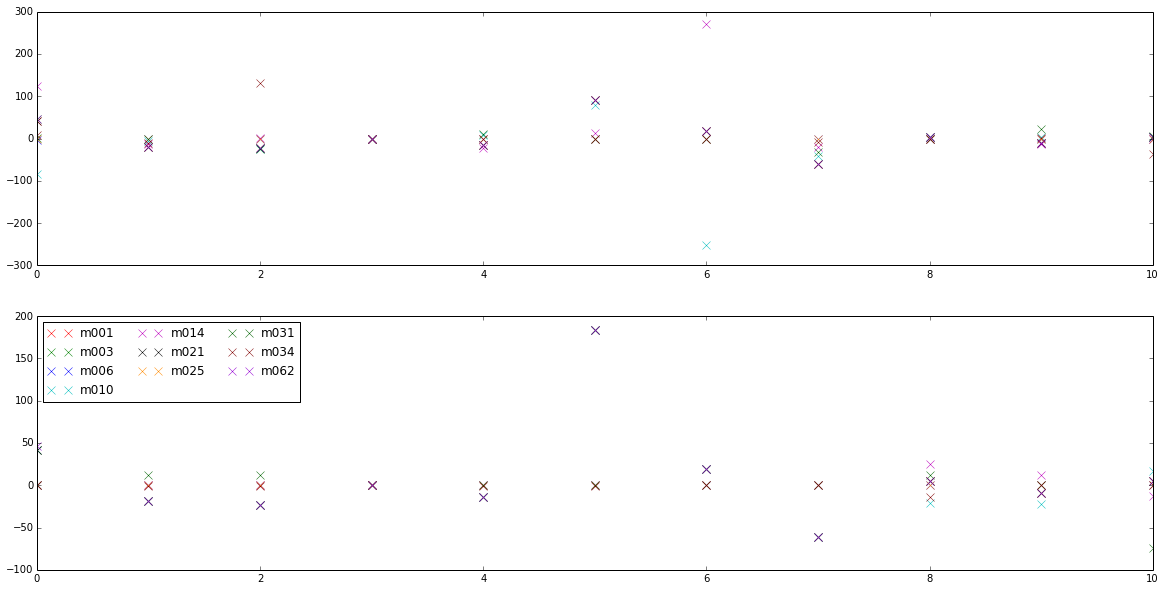

In [42]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(k_array.shape[0]):
    ax[0].plot(k_0[i],'x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[i],'x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper left',ncol=3)

# Gains

In [15]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(22, 2, 11)


In [16]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[ 0.9999  0.9996  1.      0.9994  0.9999  0.9996  0.9996  1.0021  0.9998
  1.0006  1.0013]
[ 1.0009  0.9989  0.9996  1.001   1.0003  0.9999  1.001   1.0007  0.9997
  1.0002  1.0008]


In [17]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[ 20.5324  10.0367   5.0238  29.3879  32.6126  25.4448  28.2043   9.9977
  23.3327  26.8061   1.1953]
[ 24.4126  36.8698  33.6822  42.0151  37.0306  41.5497  28.3577  34.0881
  18.6943  34.4562   3.0451]


In [18]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[ 20.5336  10.0412   5.0239  29.4059  32.6165  25.4558  28.2164   9.9764
  23.3371  26.7896   1.1938]
[ 24.3903  36.9086  33.6958  41.9724  37.0208  41.5549  28.3307  34.0653
  18.6997  34.4479   3.0427]


In [19]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[ 11.3224  61.3225  14.1653   0.      19.5627  13.6675 -33.6735   5.4515
 -27.2537 -14.8539  48.6608]
[ 27.6654   7.4598  -7.0607   0.      55.0887  37.2973 -26.3513 -24.4334
   1.3508  49.4678  37.5935]


In [20]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[-144.4005 -169.8874 -178.4158    0.       26.5097  163.3304  178.8655
 -132.6876   30.9115  -47.2561  170.1875]
[ -76.8782    5.9461  -27.6967   -0.       67.1362  -18.4624  -51.3573
    5.1553   39.7026  -73.1006 -167.7196]


In [21]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[-155.7229 -231.2099 -192.5811   -0.        6.947   149.6629  212.539
 -138.1391   58.1653  -32.4022  121.5266]
[-104.5436   -1.5136  -20.636    -0.       12.0475  -55.7597  -25.006
   29.5887   38.3518 -122.5684 -205.3131]


In [39]:
g_array.shape[0]

22

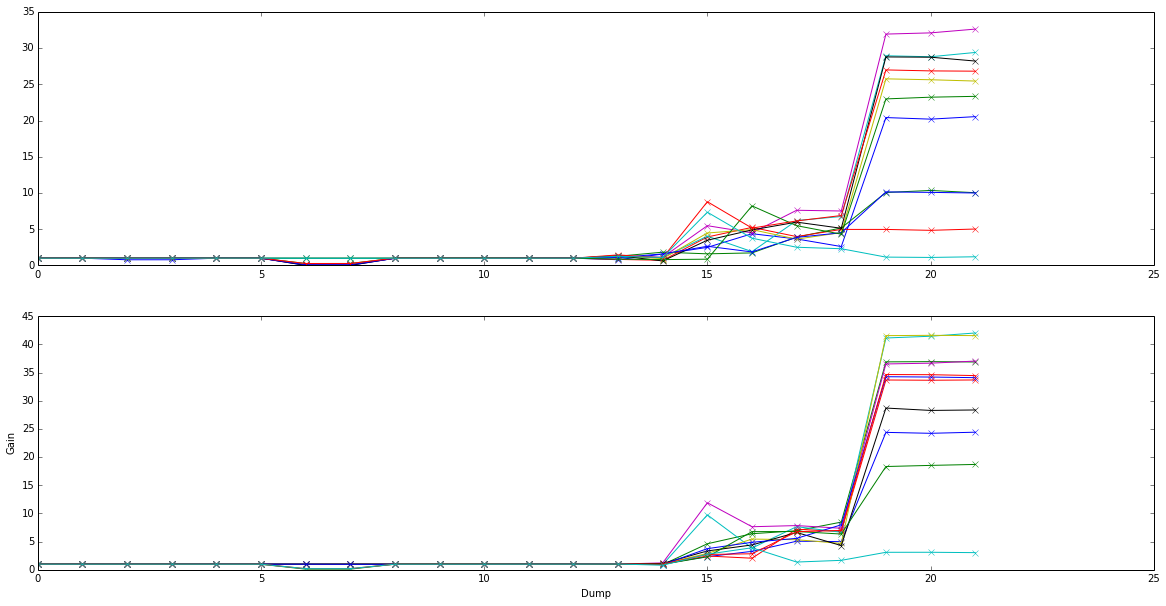

In [22]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
#plt.legend()

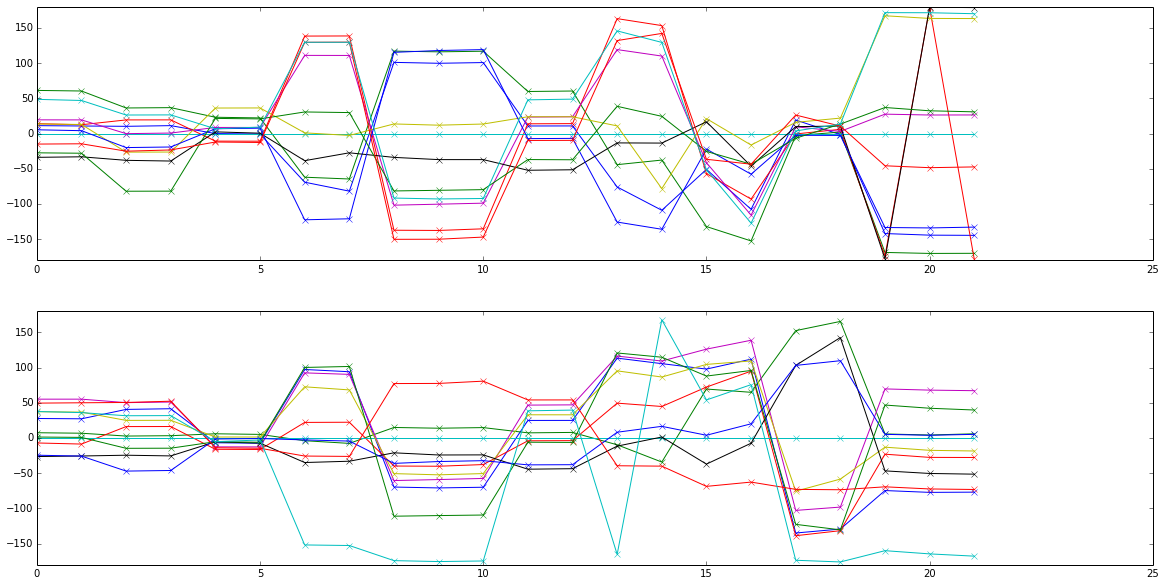

In [23]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

# Bandpasses    

In [24]:
b = h.file['TelescopeState']['cal_product_B']
b_list = []
for i, bi in enumerate(b):
    b_list.append(pickle.loads(bi[-1]))
b_array = np.array(b_list)
print b_array.shape
# bandpass shape is ntimes x channels x pol x antenna 
# where ntimes is the number of bandpasses

# just look at LAST bandpass for now
b_0_0 = b_array[-1,:,0,:]
b_1_0 = b_array[-1,:,1,:]



(5, 32768, 2, 11)


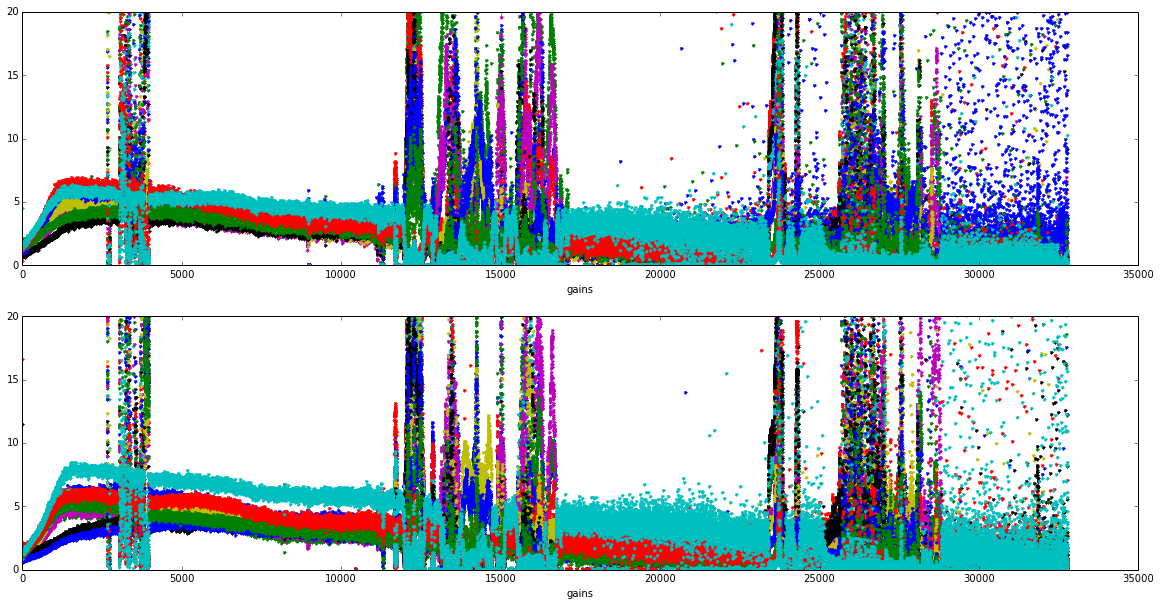

In [43]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_0),'.');
ax[0].set_ylim([0,20]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_0),'.');
ax[1].set_ylim([0,20]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

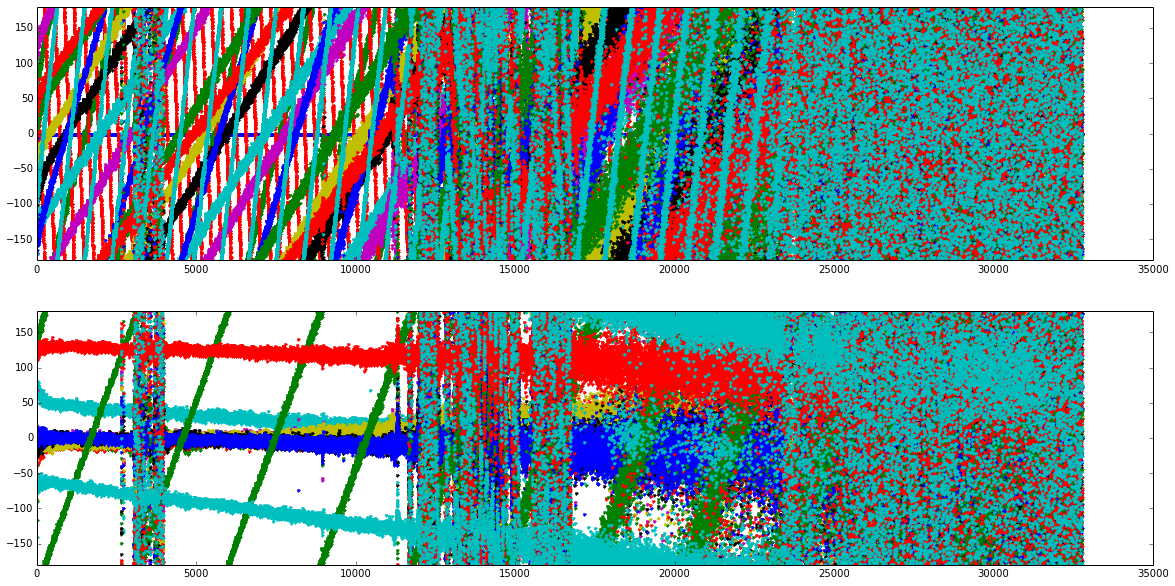

In [40]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_0)),'.');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(b_1_0)),'.');
ax[1].set_ylim([-180,180]);

In [27]:
b_array.shape
# Time,channels,pols,antennas

(5, 32768, 2, 11)

In [28]:
#last bandpass
b_0_1 = b_array[0,:,0,8]
b_1_1 = b_array[0,:,1,8]
b_1_1.shape
print a_array[:,8]

['m034']


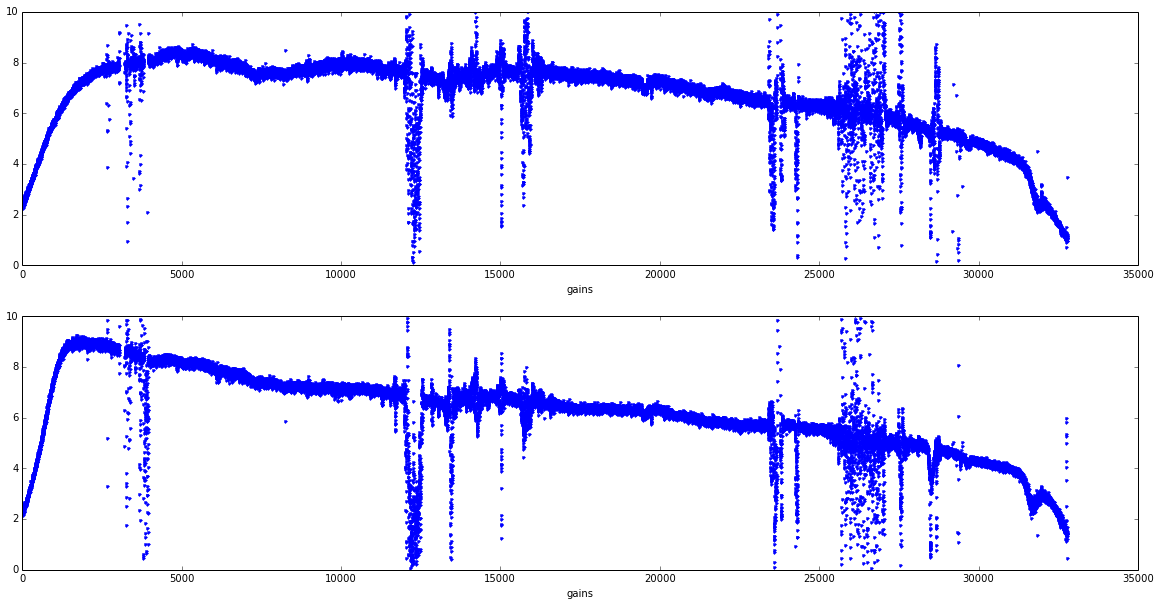

In [29]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_1),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_1),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

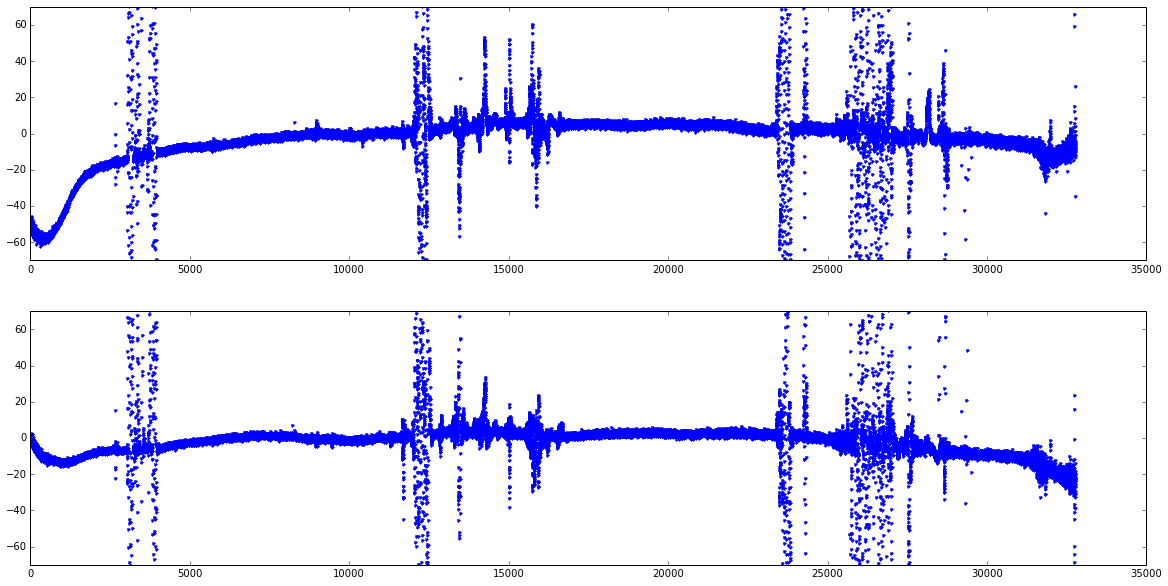

In [30]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_1)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_1)),'.');
ax[1].set_ylim([-70,70]);